In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
columns = ["model", "img_type", "accuracy", "COV_recall"]
model = ["Lenet", "Vgg16",  "Resnet152", "EfficientNetB1", "Resnet101", "Lenet", "Vgg16", "Resnet152", "EfficientNetB1", "Resnet101"]
img_type = ["images brutes", "images brutes","images brutes","images brutes","images brutes","images masquées","images masquées","images masquées","images masquées","images masquées"]
img_accuracy = [0.67, 0.85, 0.25, 0.90, 0.97, 0.73, 0.84, 0.49, 0.86, 0.90]
img_COV_recall = [0.47, 0.82, 0.01, 0.93, 0.99, 0.68, 0.79, 0.00, 0.72, 0.83]

In [ ]:
df = pd.DataFrame(list(zip(model, img_type, img_accuracy, img_COV_recall)), columns = columns)
df

,model,img_type,accuracy,COV_recall
0,Lenet,images brutes,0.67,0.47
1,Vgg16,images brutes,0.85,0.82
2,Resnet152,images brutes,0.25,0.01
3,EfficientNetB1,images brutes,0.90,0.93
4,Resnet101,images brutes,0.97,0.99
5,Lenet,images masquées,0.73,0.68
6,Vgg16,images masquées,0.84,0.79
7,Resnet152,images masquées,0.49,0.00
8,EfficientNetB1,images masquées,0.86,0.72
9,Resnet101,images masquées,0.90,0.83


Text(0.5, 1.0, 'Accuracy et Covid Recall des différents modèles')

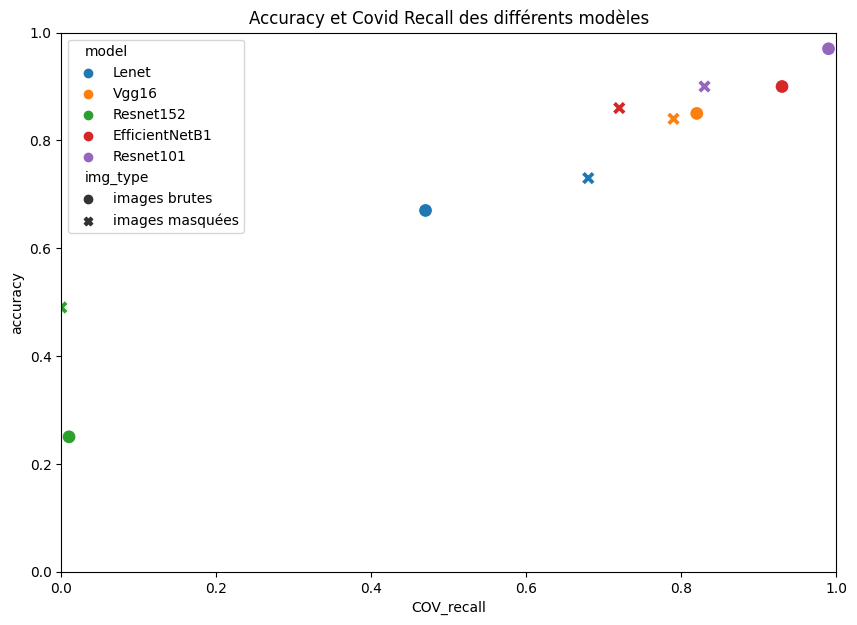

In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = "COV_recall" , y = "accuracy", data = df, hue = "model", style = "img_type", s = 100)
plt.ylim([0, 1])
plt.xlim([0, 1])

plt.title("Accuracy et Covid Recall des différents modèles")

In [ ]:
df_2 = df[["model", "accuracy"]].loc[df["img_type"] == "images brutes"]
df_2["Images brutes (acc)"] = df.loc[df["img_type"] == "images brutes"]["accuracy"]
df_2["Images masquées (acc)"] = df.loc[df["img_type"] == "images masquées"].reset_index()["accuracy"]
df_2["Images brutes (rec)"] = df.loc[df["img_type"] == "images brutes"]["COV_recall"]
df_2["Images masquées (rec)"] = df.loc[df["img_type"] == "images masquées"].reset_index()["COV_recall"]

df_2 = df_2.drop("accuracy", 1).head()
df_2.reset_index()
df_2

<ipython-input-112-d438892494b6>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_2 = df_2.drop("accuracy", 1).head()


,model,Images brutes (acc),Images masquées (acc),Images brutes (rec),Images masquées (rec)
0,Lenet,0.67,0.73,0.47,0.68
1,Vgg16,0.85,0.84,0.82,0.79
2,Resnet152,0.25,0.49,0.01,0.00
3,EfficientNetB1,0.90,0.86,0.93,0.72
4,Resnet101,0.97,0.90,0.99,0.83


Text(0.5, 1.0, 'Accuracy par modèle et par jeu de données')

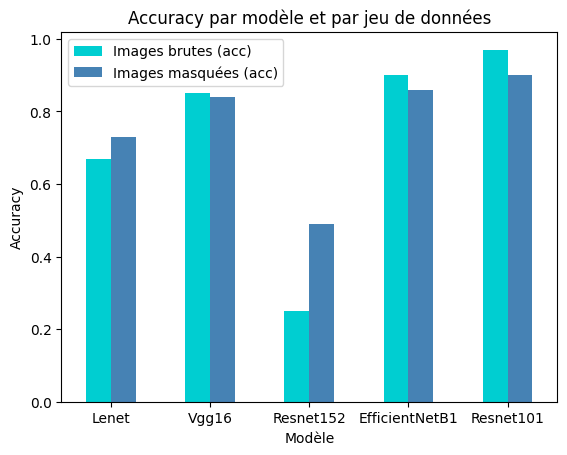

In [ ]:

df_2.plot.bar(x = "model", y = ["Images brutes (acc)", "Images masquées (acc)"], rot = 0, color={"Images brutes (acc)": "darkturquoise", "Images masquées (acc)": "steelblue"})
plt.xlabel("Modèle")
plt.ylabel("Accuracy")
plt.title("Accuracy par modèle et par jeu de données")



Text(0.5, 1.0, 'COVID Recall par modèle et par jeu de données')

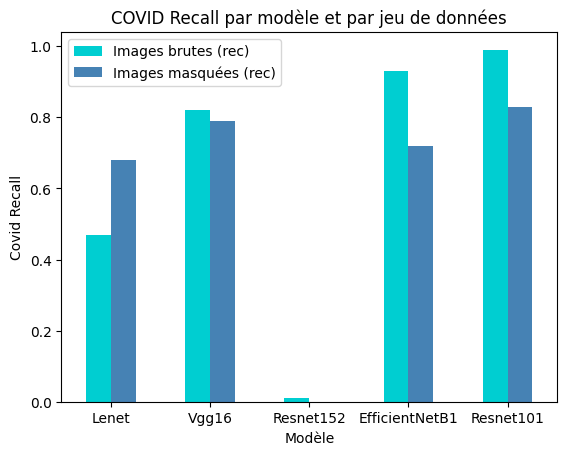

In [ ]:
df_2.plot.bar(x = "model", y = ["Images brutes (rec)", "Images masquées (rec)"], rot = 0, color={"Images brutes (rec)": "darkturquoise", "Images masquées (rec)": "steelblue"})
plt.xlabel("Modèle")
plt.ylabel("Covid Recall")
plt.title("COVID Recall par modèle et par jeu de données")